# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [46]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [47]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

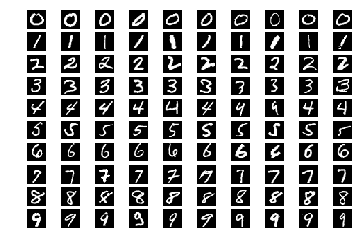

In [48]:
def P1(num_examples=10):

### STUDENT START ###
    


    def filter_value( someList, value ):
        count = 0
        for x, y in someList:
            if y == value :
                count +=1
                yield x,y
                if(count>9):
                    count =0
                    return

    #create a list of tuples containing both the images and it's labels.
    digits = list(zip(train_data, train_labels))

    #Create a list and add the list of images from 0 to 9
    result= list()
    for i in range(10):
        result.extend(list( filter_value( digits, i ) ))

    #Create a 10x10 plot
    for index, (image, label) in enumerate(result[:100]):
        plt.subplot(num_examples, num_examples, index + 1)
        plt.axis('off')
        plt.imshow(image.reshape([28,28]), cmap='gray')
        plt.grid(True)

    plt.show()


### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [49]:
def P2(k_values):

### STUDENT START ###
    
    #create an empty set to store the KNN models and Predictions of different k-values
    knnModels, predictions = {}, {}
    
    #Iterate the model initialization and model fit and prediction for each K-value
    for k in k_values:
        knnModels[k] = KNeighborsClassifier(n_neighbors=k)
        knnModels[k].fit(mini_train_data, mini_train_labels)
        predictions[k] = knnModels[k].predict(dev_data)
        print("Accuracy for k = %d is %.5f" % (k, knnModels[k].score(dev_data,dev_labels)))
    
    #Print the Classification Report just for K=1
    print("\n For k=1:")
    print(classification_report(dev_labels, predictions[1], target_names=[str(i) for i in range(10)], digits=5))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Accuracy for k = 1 is 0.88800
Accuracy for k = 3 is 0.87800
Accuracy for k = 5 is 0.86900
Accuracy for k = 7 is 0.86500
Accuracy for k = 9 is 0.86300

 For k=1:
             precision    recall  f1-score   support

          0    0.90654   0.97980   0.94175        99
          1    0.88983   1.00000   0.94170       105
          2    0.98780   0.79412   0.88043       102
          3    0.77320   0.87209   0.81967        86
          4    0.88542   0.81731   0.85000       104
          5    0.92683   0.83516   0.87861        91
          6    0.94000   0.95918   0.94949        98
          7    0.88889   0.92035   0.90435       113
          8    0.94382   0.87500   0.90811        96
          9    0.77679   0.82075   0.79817       106

avg / total    0.89237   0.88800   0.88779      1000



ANSWER: The digit '9' has been the most difficult to predict with a f1 score of 0.79817

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [50]:
%%time

import random
def P3(train_sizes, accuracies):
    
### STUDENT START ###
    #create a list of tuples containing both the images and it's labels.
    digits = list(zip(train_data, train_labels))
    
    # Initialize the KNN model with K value of 1
    knnModel = KNeighborsClassifier(n_neighbors=1)
    for train_size in train_sizes:
        digits_train_size = random.sample(digits, train_size)
        images_train_size, labels_train_size = zip(*digits_train_size)
        
        t=time.time()
        knnModel.fit(images_train_size, labels_train_size)
        t = time.time() - t
        
        accuracies.append(knnModel.score(dev_data,dev_labels))
        print("Training for %d images took %3f seconds with an accuracy of: %3f" % (train_size, t, accuracies[-1]))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training for 100 images took 0.002367 seconds with an accuracy of: 0.703000
Training for 200 images took 0.004555 seconds with an accuracy of: 0.770000
Training for 400 images took 0.009624 seconds with an accuracy of: 0.833000
Training for 800 images took 0.026718 seconds with an accuracy of: 0.866000
Training for 1600 images took 0.073200 seconds with an accuracy of: 0.905000
Training for 3200 images took 0.240382 seconds with an accuracy of: 0.929000
Training for 6400 images took 0.803571 seconds with an accuracy of: 0.953000
Training for 12800 images took 2.598377 seconds with an accuracy of: 0.952000
Training for 25000 images took 12.126842 seconds with an accuracy of: 0.968000
CPU times: user 2min 42s, sys: 201 ms, total: 2min 42s
Wall time: 2min 42s


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [51]:
def P4():

### STUDENT START ###
    
    lm = LinearRegression()
    lm.fit( np.asarray(train_sizes).reshape(-1,1), accuracies)
    print("Accuracy for training size 60000 is:%5f" % lm.predict(60000)[0])

### STUDENT END ###

P4()

Accuracy for training size 60000 is:1.258627


ANSWER: The accuracy is greater than 1 seems impossible. Even though the accuracy appears to improve when the training size increases the relationship is not linear. The accuracy will taper off after certain training size. Hence a more reasonable predictions can be acheived by using logarithamic transformations.


Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


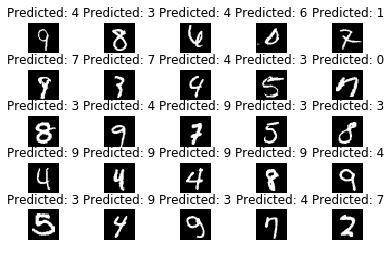

In [52]:
def P5():

### STUDENT START ###
    knnModel = KNeighborsClassifier(n_neighbors=1)
    knnModel.fit(mini_train_data, mini_train_labels)
    
    predictions = knnModel.predict(dev_data)
    
    conf_mat = confusion_matrix(dev_labels,predictions)
    print(conf_mat)
    
    count=1
    for index in range(len(dev_labels)):
        if (count==26): break
        if(dev_labels[index] != predictions[index]):
            plt.subplot(5,5,count)
            plt.subplots_adjust(hspace=0.5)
            plt.subplots_adjust(wspace=1.5)
            count += 1
            plt.title("Predicted: %d" % predictions[index])
            plt.axis('off')
            plt.imshow(dev_data[index].reshape([28,28]), cmap='gray')
            
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [53]:
from scipy.ndimage.filters import gaussian_filter

def P6():
    
### STUDENT START ###
    knnModel = KNeighborsClassifier(n_neighbors=1)
    train_blur = gaussian_filter(train_data, sigma=1)
    knnModel.fit(train_blur, train_labels)
    blur_train_predict = knnModel.predict(dev_data)
    
    dev_blur = gaussian_filter(dev_data, sigma=1)
    blur_both_predict = knnModel.predict(dev_blur)
    
    knnModel.fit(train_data,train_labels)
    blur_dev_predict = knnModel.predict(dev_blur)
    
    print("Blur the training data but not the dev data:")
    print(classification_report(dev_labels, blur_train_predict, target_names=[str(i) for i in range(10)], digits=3))
    print("Blur the dev data but not the training data:")
    print(classification_report(dev_labels, blur_dev_predict, target_names=[str(i) for i in range(10)], digits=3))
    print("Blur both the training data and the dev data:")
    print(classification_report(dev_labels, blur_both_predict, target_names=[str(i) for i in range(10)], digits=3))

### STUDENT END ###

P6()

Blur the training data but not the dev data:
             precision    recall  f1-score   support

          0      0.933     0.980     0.956        99
          1      0.835     0.962     0.894       105
          2      0.946     0.863     0.903       102
          3      0.822     0.860     0.841        86
          4      0.877     0.894     0.886       104
          5      0.881     0.813     0.846        91
          6      0.935     0.888     0.911        98
          7      0.897     0.920     0.908       113
          8      0.865     0.802     0.832        96
          9      0.837     0.821     0.829       106

avg / total      0.883     0.882     0.882      1000

Blur the dev data but not the training data:
             precision    recall  f1-score   support

          0      0.779     0.606     0.682        99
          1      0.722     0.790     0.755       105
          2      0.738     0.471     0.575       102
          3      0.663     0.709     0.685        86
     

ANSWER: After experimenting with Various methods to blur the image, I have found that the gaussian filter with variance of 1 seemed to work the best. Especially when you blur the training data alone it generalizes the model and the accuracy and f-1 score are 0.88.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [54]:
def P7():

### STUDENT START ###

    bernModel = BernoulliNB(binarize=0.5)
    bernModel.fit(train_data,train_labels)
    bern_pred = bernModel.predict(dev_data)
    print("Bernoulli Classification:")
    print(classification_report(dev_labels, bern_pred, target_names=[str(i) for i in range(10)], digits=3))

    multiModel = MultinomialNB()
    multiModel.fit(np.digitize(train_data, [0.01,0.25,0.75]),train_labels)
    multi_pred = multiModel.predict(dev_data)
    print("Multinomial NB Classification:")
    print(classification_report(dev_labels, multi_pred, target_names=[str(i) for i in range(10)], digits=3))
    
### STUDENT END ###

P7()

Bernoulli Classification:
             precision    recall  f1-score   support

          0      0.942     0.980     0.960        99
          1      0.862     0.952     0.905       105
          2      0.880     0.794     0.835       102
          3      0.699     0.756     0.726        86
          4      0.860     0.827     0.843       104
          5      0.875     0.769     0.819        91
          6      0.905     0.878     0.891        98
          7      0.930     0.823     0.873       113
          8      0.752     0.823     0.786        96
          9      0.759     0.830     0.793       106

avg / total      0.849     0.845     0.845      1000

Multinomial NB Classification:
             precision    recall  f1-score   support

          0      0.923     0.970     0.946        99
          1      0.853     0.943     0.896       105
          2      0.867     0.765     0.812       102
          3      0.730     0.756     0.743        86
          4      0.886     0.750     0

ANSWER: After experimenting with various binarization parameters and smoothing parameters, I find that both Bernoulli and Multinomial Naive Bayes classification preform very similar to each other and accuracy doens't improve much. It's because of the underlying classification algorithm is same for both of these methods.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [55]:
def P8(alphas):

### STUDENT START ###
    nbmodel = GridSearchCV(BernoulliNB(binarize=0.5), alphas, scoring='accuracy')
    nbmodel.fit(train_data, train_labels)
    #nbmodel.fit(mini_train_data, mini_train_labels)
    return nbmodel

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [56]:
print(nb.best_params_)
print(nb.grid_scores_)

{'alpha': 0.0}
[mean: 0.83712, std: 0.00253, params: {'alpha': 0.0}, mean: 0.83690, std: 0.00270, params: {'alpha': 0.0001}, mean: 0.83670, std: 0.00266, params: {'alpha': 0.001}, mean: 0.83652, std: 0.00268, params: {'alpha': 0.01}, mean: 0.83615, std: 0.00274, params: {'alpha': 0.1}, mean: 0.83543, std: 0.00269, params: {'alpha': 0.5}, mean: 0.83505, std: 0.00284, params: {'alpha': 1.0}, mean: 0.83452, std: 0.00293, params: {'alpha': 2.0}, mean: 0.83245, std: 0.00271, params: {'alpha': 10.0}]


ANSWER: When I use the mini_train_data, The best value for alpha is 0.01 and it's mean accuracy is 0.821. The mean accuracy when alpha = 0 is 0.803.

Whereas, when I use the full train_data, the best value for alpha is 0.0 and it's mean accuracy is 0.83712. I would expect the alpha to improve the accuracy because of the smoothing effect, so it's tricky when the best value for alpha is 0.0. Maybe it's because the BernoulliNB takes binary values.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [57]:
def P9():

### STUDENT END ###
    GaussModel = GaussianNB()
    GaussModel.fit(train_data, train_labels)
    pred = GaussModel.predict(dev_data)
    print(classification_report(dev_labels, pred, target_names=[str(i) for i in range(10)], digits=3))
    return GaussModel

### STUDENT END ###

gnb = P9()

             precision    recall  f1-score   support

          0      0.722     0.970     0.828        99
          1      0.832     0.943     0.884       105
          2      0.897     0.255     0.397       102
          3      0.766     0.419     0.541        86
          4      0.846     0.212     0.338       104
          5      0.400     0.022     0.042        91
          6      0.662     0.939     0.776        98
          7      0.795     0.274     0.408       113
          8      0.328     0.698     0.447        96
          9      0.386     0.943     0.548       106

avg / total      0.668     0.571     0.524      1000



In [58]:
# Decrease the sample variance in order to improve accuracy.
gnb.sigma_ = gnb.sigma_ * 0.05

pred = gnb.predict(dev_data)
print(classification_report(dev_labels, pred, target_names=[str(i) for i in range(10)], digits=3))

             precision    recall  f1-score   support

          0      0.950     0.960     0.955        99
          1      0.977     0.810     0.885       105
          2      0.778     0.824     0.800       102
          3      0.800     0.744     0.771        86
          4      0.894     0.731     0.804       104
          5      0.771     0.813     0.791        91
          6      0.901     0.929     0.915        98
          7      0.917     0.681     0.782       113
          8      0.625     0.833     0.714        96
          9      0.702     0.868     0.776       106

avg / total      0.834     0.818     0.820      1000



ANSWER: Decreasing the sample variance / sigma of the Gaussian model has significantly improved the predication accuracy of the model.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

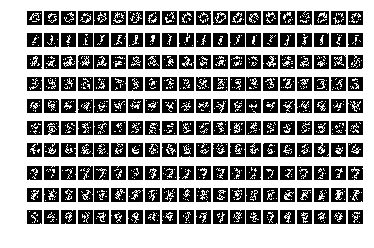

In [59]:
def P10(num_examples):

### STUDENT START ###
    bern = BernoulliNB(binarize=0.5)
    bern.fit(mini_train_data,mini_train_labels)
    
    fig, ax = plt.subplots(10, num_examples)
    for i in range(10):
        prob = np.exp(bern.feature_log_prob_[i])
        for j in range(num_examples):
            ax[i][j].imshow(np.int32(prob > np.random.rand(784)).reshape([28,28]), cmap='gray')
            ax[i][j].axis('off')

### STUDENT END ###

P10(20)

ANSWER: Regenerating the image from the trained Bernoulli model makes the image very grainy. This is because each pixel is either 0 or 1 and hence there is no smoothing.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [60]:
def P11(buckets, correct, total):
    
### STUDENT START ###
           
    data_in_buckets = np.digitize(mini_train_data,buckets)
    nbModel = BernoulliNB(alpha=1)
    nbModel.fit(data_in_buckets,mini_train_labels)
    preds = nbModel.predict(dev_data)
    
    for i in range(len(buckets)):        
        for pred, label in zip(preds[i:],dev_labels[i:]):
            if pred == label: correct[i] += 1
            total[i] += 1
              
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' % (buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total = 1000    accuracy = 0.796
p(pred) <= 0.9000000000000    total = 999    accuracy = 0.797
p(pred) <= 0.9990000000000    total = 998    accuracy = 0.797
p(pred) <= 0.9999900000000    total = 997    accuracy = 0.796
p(pred) <= 0.9999999000000    total = 996    accuracy = 0.797
p(pred) <= 0.9999999990000    total = 995    accuracy = 0.797
p(pred) <= 0.9999999999900    total = 994    accuracy = 0.798
p(pred) <= 0.9999999999999    total = 993    accuracy = 0.798
p(pred) <= 1.0000000000000    total = 992    accuracy = 0.797


ANSWER: The highest accuracy is for the bin <=0.9999999999999 : 0.798

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [61]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()